<a href="https://colab.research.google.com/github/Lannn21/11-05-2023/blob/main/Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [2]:
import pandas as pd

1. display 5 columns from dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Lannn21/Week3DatamineMBA/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [17]:
df['admission'].value_counts(dropna=False)

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [18]:
df['race'].value_counts(dropna=False)

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [7]:
df['admission'].fillna("deny", inplace=True)
df['race'].fillna("other", inplace=True)

<ipython-input-7-960a8e814952>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna("deny", inplace=True)
<ipython-input-7-960a8e814952>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

5. recheck missing value

In [20]:
df.isna().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [8]:
df=df.drop(df.columns[0], axis = 1)

7. show describe column and conclude what the insight is from that column

In [26]:
df.describe()


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

In [4]:
import matplotlib.pyplot as plt

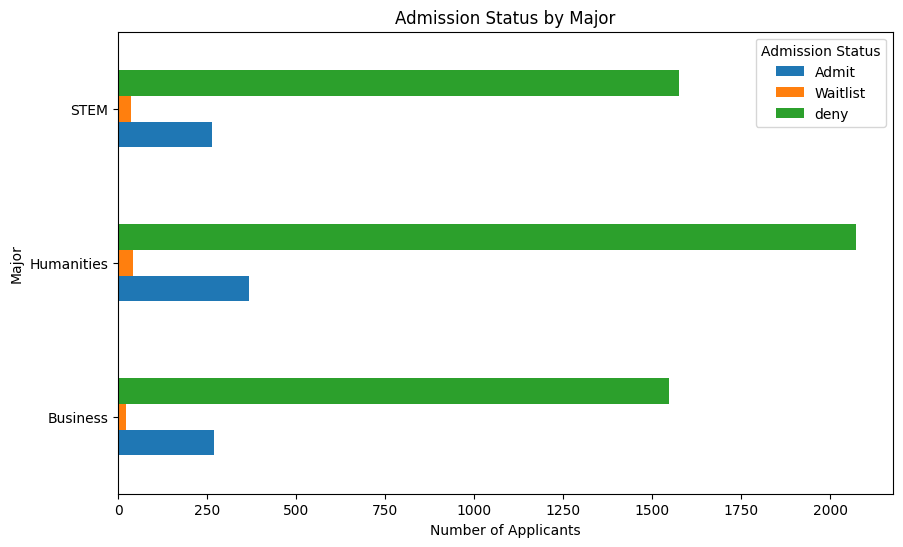

In [9]:
count_type_by_admission = df.groupby(['major', 'admission']).size().unstack()

count_type_by_admission.plot(kind='barh', figsize=(10, 6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

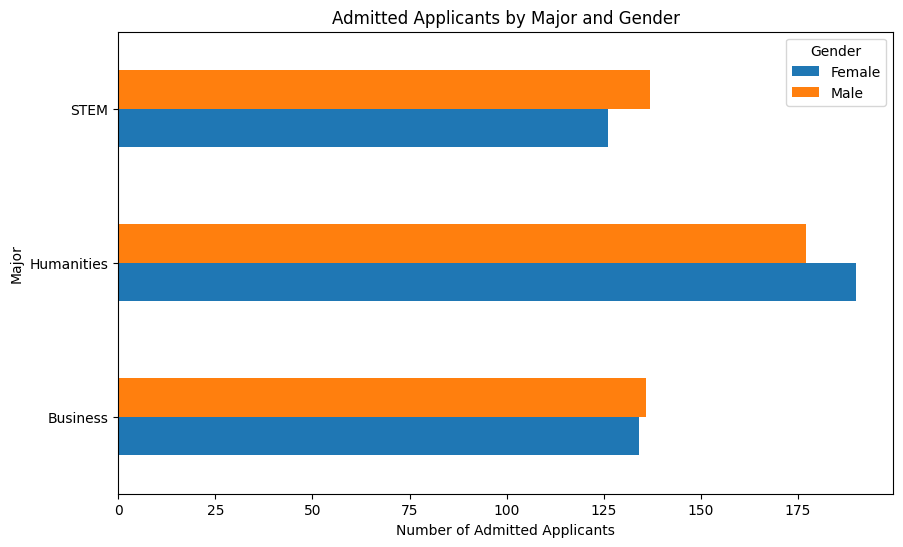

In [22]:
admitted = df[df['admission'] == 'Admit']

count_by_major_gender = admitted.groupby(['major', 'gender']).size().unstack()

count_by_major_gender.plot(kind='barh', figsize=(10, 6))
plt.title('Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

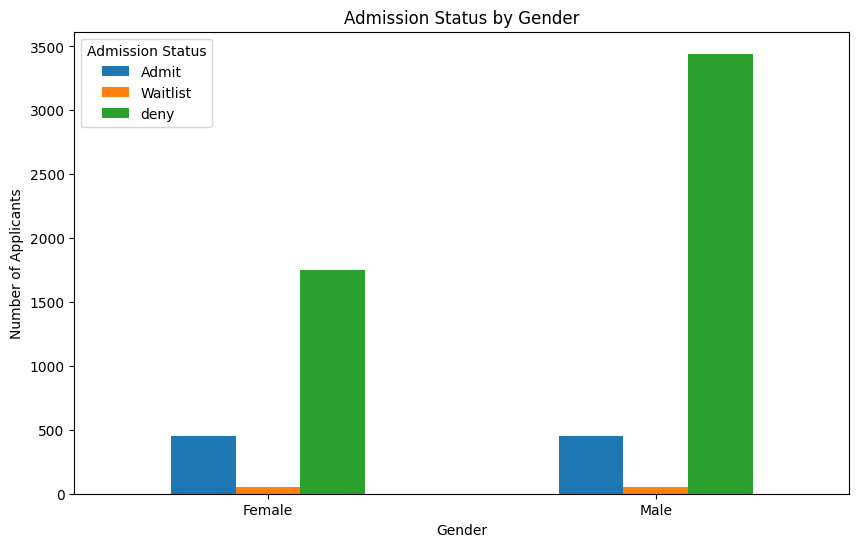

Dari visualisasi ini, kita dapat mengamati apakah terdapat perbedaan signifikan dalam GPA antara gender.
Jika satu gender secara konsisten memiliki median GPA yang lebih tinggi atau rentang interkuartil yang lebih lebar,
ini dapat menunjukkan variasi dalam kinerja akademik atau akses terhadap sumber daya pendidikan.
Analisis ini dapat berguna untuk memahami dinamika gender dalam kumpulan pelamar.


In [28]:
gender_admission_counts = df.groupby(['gender', 'admission']).size().unstack()
gender_admission_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Admission Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.legend(title='Admission Status')

plt.show()
print("Dari visualisasi ini, kita dapat mengamati apakah terdapat perbedaan signifikan dalam GPA antara gender.")
print("Jika satu gender secara konsisten memiliki median GPA yang lebih tinggi atau rentang interkuartil yang lebih lebar,")
print("ini dapat menunjukkan variasi dalam kinerja akademik atau akses terhadap sumber daya pendidikan.")
print("Analisis ini dapat berguna untuk memahami dinamika gender dalam kumpulan pelamar.")

11. create your own insightful visualization and explain it in at least 2 sentences

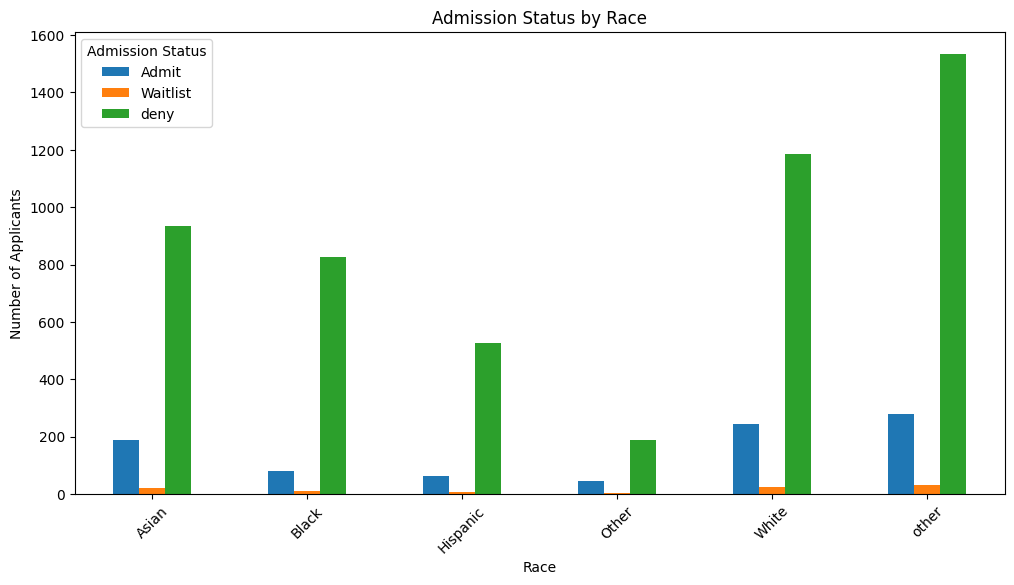

Dari visualisasi ini, kita dapat menganalisis apakah ada perbedaan signifikan dalam hasil penerimaan 
di antara kelompok ras yang berbeda. Jika kelompok ras tertentu secara konsisten diterima dengan 
tingkat yang lebih rendah, hal ini dapat menimbulkan pertanyaan penting mengenai kesetaraan dan 
keadilan dalam proses penerimaan. Analisis ini bisa sangat penting untuk memahami keberagaman 
dan representasi dalam kumpulan pelamar, serta dapat menginformasikan strategi rekrutmen di masa mendatang.


In [32]:
race_admission_counts = df.groupby(['race', 'admission']).size().unstack()

race_admission_counts.plot(kind='bar', figsize=(12, 6))

plt.title('Admission Status by Race')
plt.xlabel('Race')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.legend(title='Admission Status')
plt.show()

print("Dari visualisasi ini, kita dapat menganalisis apakah ada perbedaan signifikan dalam hasil penerimaan ")
print("di antara kelompok ras yang berbeda. Jika kelompok ras tertentu secara konsisten diterima dengan ")
print("tingkat yang lebih rendah, hal ini dapat menimbulkan pertanyaan penting mengenai kesetaraan dan ")
print("keadilan dalam proses penerimaan. Analisis ini bisa sangat penting untuk memahami keberagaman ")
print("dan representasi dalam kumpulan pelamar, serta dapat menginformasikan strategi rekrutmen di masa mendatang.")

12. encode categorical columns and display the results

In [ ]:
#12

# Encode categorical columns (except the admission column)


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [33]:
from sklearn.preprocessing import LabelEncoder


In [42]:
le = LabelEncoder()

for cat_var in ['gender', 'international', 'major', 'race', 'work_industry']:
    df[cat_var] = le.fit_transform(df[cat_var])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


In [44]:
dle = LabelEncoder()

for cat_var in ['gender', 'international', 'major', 'race', 'work_industry','admission']:
    df[cat_var] = le.fit_transform(df[cat_var])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

In [47]:

import seaborn as sns

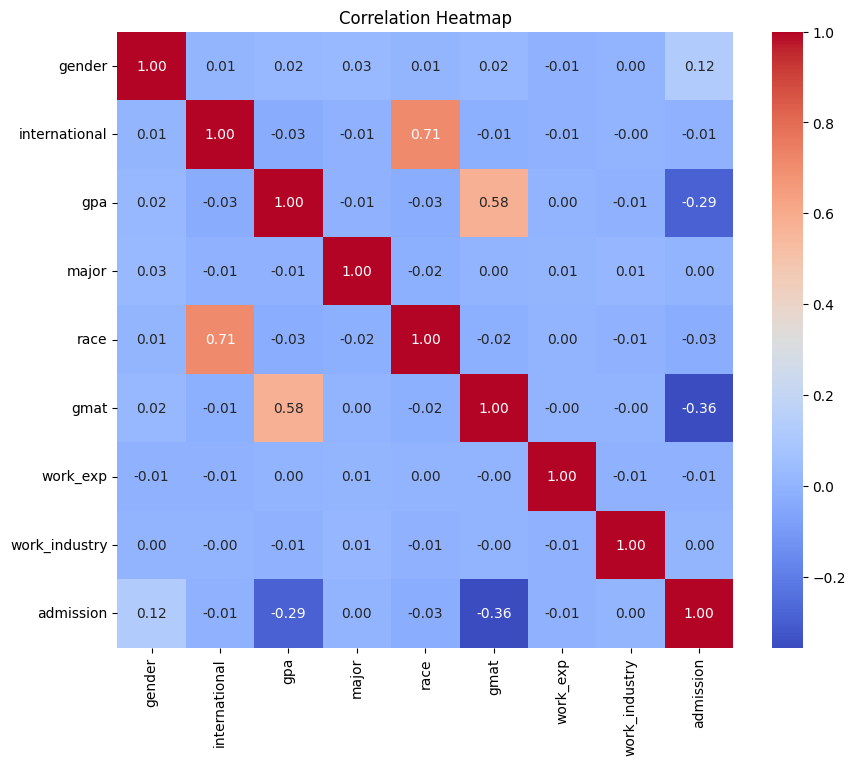

In [48]:

correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Heatmap')
plt.show()


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('admission', axis=1)
y = df['admission']

y = y.map({'Admit': 1, 'Deny': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy = 0.7828894269572235
print(f'Accuracy: {accuracy:.2f}')



ValueError: Input y contains NaN.

In [50]:
import pandas as pd

lisa_data = {
    'gender': 0,
    'international': 0,
    'gpa': df['gpa'].mean(),
    'major': 0,
    'race': 2,
    'gmat': 580,
    'work_exp': 2,
    'work_industry': 1
}

lisa_df = pd.DataFrame([lisa_data])

lisa_df_encoded = pd.get_dummies(lisa_df, columns=['major', 'race', 'work_industry'], drop_first=True)

lisa_df_encoded = lisa_df_encoded.reindex(columns=X.columns, fill_value=0)

work_industry_prediction = dt_classifier.predict(lisa_df_encoded)

industry_labels = {0: "Other", 1: "Finance", 2: "Consulting", 3: "Technology"}
predicted_industry = industry_labels.get(work_industry_prediction[0], "Unknown")

print(f'Prediction for Lisa\'s work industry: {predicted_industry}')



AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'